# Task 2
## Simple Linear Regression

In this task, we will predict the marks of a student based upon the number of hours studied. The dataset for this problem can be found here: http://bit.ly/w-data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data from the remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now we will make a scatter plot of the dataset to see the relation between the marks scored and the number of hours put in.

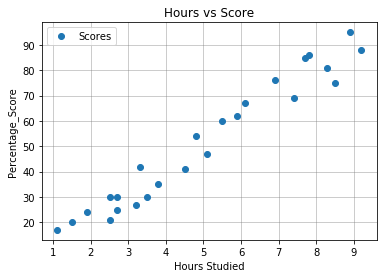

In [3]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Score")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage_Score')
plt.grid(zorder=0, color='grey', alpha=0.5)
plt.show()

### Preparing the Data
Now we divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

Now we split the data into training sets and test sets. We will do this using Scikit-Learn's train_test_split method.

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the Algorithm
Now we are going to train our algorithm

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


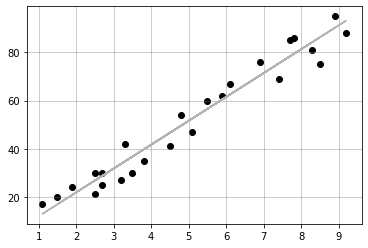

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='black')
plt.plot(X, line,color='0.70');
plt.grid(zorder=0, color='grey',alpha=0.5)
plt.show()

### Making Predictions
We are done with training our model. Let's move onto making some predictions

In [8]:
print(X_test)
# Testing data (Hours)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual and Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted_Score = {:.2f}".format(own_pred[0]))

No of Hours = 9.25
Predicted_Score = 93.69


In [11]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002975
